Contexto:
Una entidad bancaria, lo contrata como ingeniero de desarrollo de IA para realizar un
modelo de clasificación binaria para detectar fraudes (1:Fraude, 0:No Fraude), elabore un
código basado en el modelo de SVM para resolver el hito de desarrollo propuesto.

In [1]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt

In [2]:
credit_df =pd.read_csv('CreditCard.csv')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**(1:Fraude, 0:No Fraude)**

In [4]:
credit_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
print(credit_df.columns)  # Muestra todas las columnas del DataFrame

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


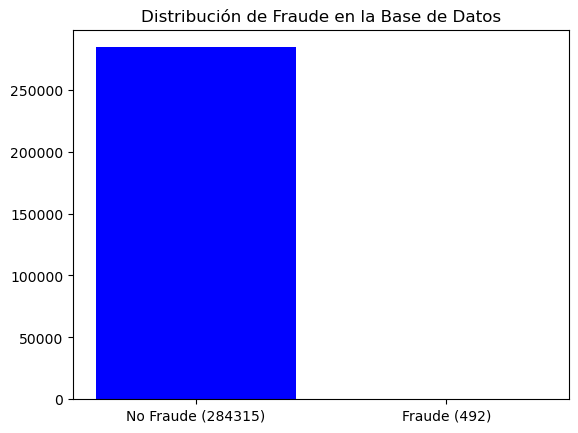

In [6]:
num_NoFraude = credit_df[credit_df["Class"] == 0].shape[0]  # Cantidad de No Fraude
num_Fraude = credit_df[credit_df["Class"] == 1].shape[0]  # Cantidad de Fraudes

# Graficar distribución
import matplotlib.pyplot as plt

plt.bar(["No Fraude (%d)" % num_NoFraude, "Fraude (%d)" % num_Fraude],
        [num_NoFraude, num_Fraude],
        color=["blue", "red"],
        width=0.8)
plt.title("Distribución de Fraude en la Base de Datos")
plt.show()

In [7]:
# Eliminar columnas innecesarias antes de la separación en X e y
credit_df.drop(columns=['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 
                        'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
                        'V26', 'V27', 'V28', 'Amount'], inplace=True)
credit_df['Class'] = credit_df['Class']  # Mantener la columna objetivo

In [8]:
print(credit_df.columns)  # Muestra todas las columnas del DataFrame

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Class'], dtype='object')


**Separar características (X) y variable objetivo (y)**


In [9]:
# Separar características (X) y variable objetivo (y)
X = credit_df.drop("Class", axis=1)  # Todas las columnas excepto 'Class'
y = credit_df["Class"]  # Solo la columna 'Class'

# Dividir en entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Verificar la distribución de clases en el conjunto de entrenamiento
print("Distribución en entrenamiento:")
print(y_train.value_counts())

print("\nDistribución en prueba:")
print(y_test.value_counts())


Distribución en entrenamiento:
Class
0    213236
1       369
Name: count, dtype: int64

Distribución en prueba:
Class
0    71079
1      123
Name: count, dtype: int64


### Uso de SMOTE

In [10]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE solo en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
print("Distribución después de SMOTE:")
print(y_train_smote.value_counts())
y_train_smote

Distribución después de SMOTE:
Class
0    213236
1    213236
Name: count, dtype: int64


0         0
1         0
2         0
3         0
4         0
         ..
426467    1
426468    1
426469    1
426470    1
426471    1
Name: Class, Length: 426472, dtype: int64

C:\Users\santi\AppData\Local\Temp\ipykernel_23740\390688160.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dfclass['Class'], palette=['blue', 'orange'])


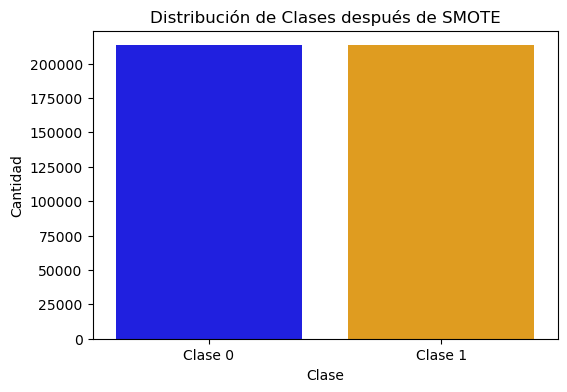

In [11]:
import seaborn as sns

dfclass = pd.DataFrame(y_train_smote)

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.countplot(x=dfclass['Class'], palette=['blue', 'orange'])

# Etiquetas y título
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases después de SMOTE")
plt.xticks([0, 1], labels=['Clase 0', 'Clase 1'])

# Mostrar el gráfico
plt.show()


In [12]:
dfsmote_y = pd.DataFrame(y_train_smote)
dfsmote_X = pd.DataFrame(X_train_smote)

In [13]:
dfsmote_y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Creación de la SVM


In [14]:
# Definició del modelo que llamaremos mod
mod = SVC(kernel='rbf')

In [ ]:
# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#w
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
mod.fit(dfsmote_X.values, dfsmote_y.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

In [60]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = mod.predict(X_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

D:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicción terminada en 0.8648409843444824 segundos


In [61]:
# Evaluamos la precisión 
accuracy_score(y_test, y_pred)

0.9985955450689588

### Matriz de confusion

In [62]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_fraude = confusion_matrix(y_test, y_pred)
conf_fraude

array([[71061,    18],
       [   82,    41]], dtype=int64)

In [64]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

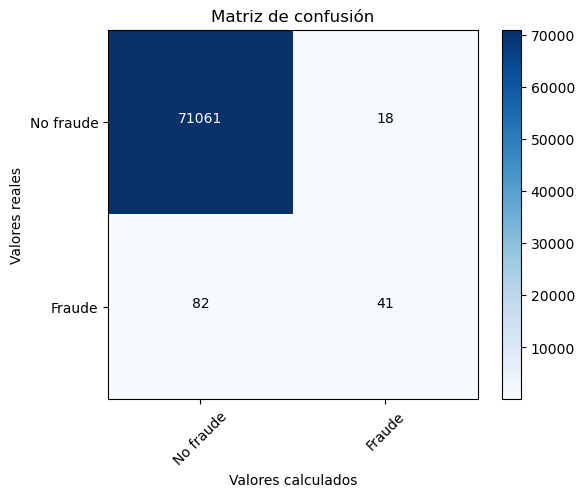

In [65]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_fraude)
# classes = las clases a predecir (si es fraude o no)
plot_cm(conf_fraude, ['No fraude', 'Fraude'])